<a href="https://colab.research.google.com/github/SriSathwik1905/CyberBullying/blob/main/AdaBoost_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
# Load the dataset
df = pd.read_csv("final_hateXplain.csv")

# Display the first few rows
print(df.head())

                                             comment       label     Race  \
0                     0 u0 lmao wow fuck you too 😂 😂      normal  No_race   
1  1 0 th floor maybe wow cnn with the fakenews t...   offensive  No_race   
2  1 0 yrs <number> white women raped by niggers ...  hatespeech  African   
3  1 2 h ago ching chong accepted your friend req...   offensive    Asian   
4  1 8 th century mayhem and lawlessness had noth...      normal  No_race   

       Religion     Gender Sexual Orientation Miscellaneous  
0  Nonreligious  No_gender     No_orientation           NaN  
1  Nonreligious  No_gender     No_orientation         Other  
2  Nonreligious  No_gender     No_orientation           NaN  
3  Nonreligious  No_gender     No_orientation           NaN  
4  Nonreligious  No_gender     No_orientation           NaN  


In [ ]:
# Download the stopwords
nltk.download('stopwords')

# Initialize stemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    # Apply stemming
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [ ]:
# Apply preprocessing
df['cleaned_comment'] = df['comment'].apply(preprocess_text)

# Display the first few cleaned comments
print(df['cleaned_comment'].head())

0                                      u lmao wow fuck
1    th floor mayb wow cnn fakenew bodi count go wa...
2    yr number white women rape nigger number negre...
3              h ago ching chong accept friend request
4    th centuri mayhem lawless noth loud mouth dona...
Name: cleaned_comment, dtype: object


In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
# Fit and transform the cleaned comments
X = tfidf.fit_transform(df['cleaned_comment']).toarray()

In [ ]:
# Extract labels
y = df['label']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Ensure labels are numeric
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
# Initialize AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=100)

In [ ]:
# Train the model
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=100)

In [ ]:
# Predict on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

In [ ]:
# Evaluate the model's performance
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Classifier Accuracy: {adaboost_accuracy:.2f}")

AdaBoost Classifier Accuracy: 0.64


In [ ]:
# Classification report
print("\nAdaBoost Classifier Classification Report:")
print(classification_report(y_test, y_pred_adaboost))


AdaBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1286
           1       0.60      0.79      0.68      1548
           2       0.55      0.38      0.45      1188

    accuracy                           0.64      4022
   macro avg       0.64      0.62      0.62      4022
weighted avg       0.64      0.64      0.63      4022



In [ ]:
# Confusion Matrix
adaboost_cm = confusion_matrix(y_test, y_pred_adaboost)

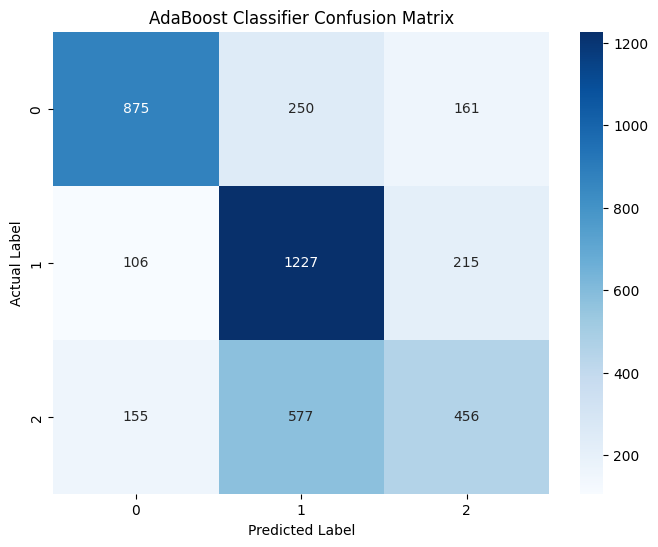

In [ ]:
# Plotting Confusion Matrix for AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(adaboost_cm, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Classifier Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Feature importance in AdaBoost
feature_importance = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'importance': adaboost_model.feature_importances_
})

In [ ]:
# Sort by the absolute value of importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

In [ ]:
# Display the top 10 important features
print("Top 10 important features for classifying:")
print(feature_importance.head(10))

Top 10 important features for classifying:
       feature  importance
1533    faggot        0.04
2180        im        0.02
2906  mudshark        0.02
757      ching        0.02
2932     muzzi        0.02
2931    muzrat        0.02
1157    deport        0.02
2924     mussi        0.02
2922    muslim        0.02
1784       gay        0.02
